# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science 

## Homework 1: Data Collection - Web Scraping - Data Parsing

**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas and Kevin Rader



<hr style='height:2px'>

In [1]:
## RUN THIS CELL TO GET THE RIGHT FORMATTING 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- The deliverables in Canvas are: <br/>
    a) This python notebook with your code and answers, plus a pdf version of it (see Canvas for details),<br/>
    b) the bibtex file you created, <br/>
    c) The CSV file you created, <br/>
    d) The JSON file you created. <br/>
    
- Exercise **responsible scraping**. Web servers can become slow or unresponsive if they receive too many requests from the same source in a short amount of time. Use a delay of 10 seconds between requests in your code. This helps not to get blocked by the target website. Run the webpage fetching part of the homework only once and do not re-run after you have saved the results in the JSON file (details below). 
- Web scraping requests can take several minutes. This is another reason why you should not wait until the last minute to do this homework.
- For this assignment, we will use Python 3.5 for grading.


# Data Collection - Web Scraping - Data Parsing 
 

In this homework, your goal is to learn how to acquire, parse, clean, and analyze data. Initially you will read the data from a file, and then later scrape them directly from a website. You will look for specific pieces of information by parsing the data, clean the data to prepare them for analysis, and finally, answer some questions.

In doing so you will get more familiar with three of the common file formats for storing and transferring data, which are:
- CSV, a text-based file format used for storing tabular data that are separated by some delimiter, usually comma or space.
- HTML/XML, the stuff the web is made of.
- JavaScript Object Notation (JSON), a text-based open standard designed for transmitting structured data over the web.

In [2]:
# import the necessary libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns

## Help a professor parse their publications and extract information.

### Overview

In this part your goal is to parse the HTML page of a professor containing some of his/her publications, and answer some questions. This page is provided to you in the file `data/publist_super_clean.html`. There are 45 publications in descending order from No. 244 to No. 200.


In [3]:
# use this file provided
PUB_FILENAME = 'data/publist_super_clean.html'

<div class='exercise'><b> Question 1 [40 pts]: Parsing and Converting to bibTex and CSV using Beautiful Soup and python string manipulation </b></div>

A lot of the bibliographic and publication information is displayed in various websites in a not-so-structured HTML files. Some publishers prefer to store and transmit this information in a .bibTex file which looks roughly like this (we've simplified a few things):
```
@article { 
     author = "John Doyle"
     title = "Interaction between atoms"
     URL = "Papers/PhysRevB_81_085406_2010.pdf"
     journal = "Phys. Rev. B"
     volume = "81"
}
```
You will notice that this file format is a set of items, each of which is a set of key-value pairs. In the python world, you can think of this as a list of dictionaries.
If you think about spreadsheets (as represented by CSV files), they have the same structure. Each line is an item, and has multiple features, or keys, as represented by that line's value for the column corresponding to the key.

You are given an .html file containing a list of papers scraped from the author's website and you are to write the information into .bibTex and .CSV formats. A useful tool for parsing websites is BeautifulSoup  (http://www.crummy.com/software/BeautifulSoup/) (BS).  In this problem, will parse the  file using BS, which makes parsing HTML a lot easier.

**1.1** Write a function called `make_soup` that accepts a filename for an HTML file and returns a BS object.
    
**1.2** Write a function that reads in the BS object, parses it, converts it into a list of dictionaries: one dictionary per paper. Each of these dictionaries should have the following format (with different values for each publication):
```
{'author': 'L.A. Agapito, N. Kioussis and E. Kaxiras',
 'title': '"Electric-field control of magnetism in graphene quantum dots:\n Ab initio calculations"',
 'URL': 'Papers/PhysRevB_82_201411_2010.pdf',
 'journal': 'Phys. Rev. B',
 'volume': '82'}
```


**1.3** Convert the list of dictionaries into standard .bibTex format using python string manipulation, and write the results into a file called `publist.bib`.

**1.4** Convert the list of dictionaries into standard tabular .csv format using pandas, and write the results into a file called `publist.csv`. The csv file should have a header and no integer index.

    
#### HINT 
- Inspect the HTML code for tags that indicate information chunks such as `title` of the paper.  The `find_all` method of BeautifulSoup might be useful.
- Question 1.2 is better handled if you break the code into functions, each performing a small task such as finding the author(s) for each paper. 
- Question 1.3 is effectively tackled by first using python string formatting on a template string.
- Make sure you catch exceptions when needed. 
- Make sure you check for **missing data** and handle these cases as you see fit. 


#### Resources
- [BeautifulSoup Tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/).
- More about the [BibTex format](http://www.bibtex.org).<BR>
    
### Answers 

In [4]:
# import the necessary libraries 
from bs4 import BeautifulSoup

<span class='sq'>**1.1 Write a function called `make_soup`  ...**</span>

In [5]:
def make_soup(filename: str) -> BeautifulSoup: 
    '''Open the file and convert into a BS object. 
       
       Args:
           filename: A string name of the file.
       
       Returns:
           A BS object containing the HTML page ready to be parsed.
    '''
    # your code here
    with open(filename) as my_file:
        pubs = my_file.read()
        try:
            soup = BeautifulSoup(pubs, "html.parser")
        except AttributeError as e:
            return None
    return soup

soup = make_soup(PUB_FILENAME)

In [6]:
# check your code - print the BS object, you should get a familiar HTML page as text
# clear/remove output before making pdf
print(soup)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efth

Your output should look **like** this:
```
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  035325 (2011)
<br/>
</li>
</ol>

...

```

**1.2 Write a function that reads in the BS object, parses it, converts it into a list of dictionaries...**

In [7]:
# clear output before making pdf
# your code here 


# start taking the soup apart
articles = soup.find_all('li')

for i, art in enumerate(articles):
    print(art, i)
    
# helper functions to parse the soup

# find <i> tags. they contain the journal name
def get_jname(tag):
    try:
        return tag.find('i').text.strip()
    except:
        print("ERROR finding journal name in")
        print(tag)
        return None

# find <b> tags. they contain the volume number
def get_volume(tag):
    try:
        return tag.find('b').text.strip()
    except:
        print("ERROR finding volume number in")
        print(tag)
        return None
    
def get_author(tag):
    try:
        #return re.sub(r',$','', tag.contents[4].strip())  # remove ',' at end of line
        authorstring = tag.contents[4].strip()
        if authorstring[-1]==',':
            return authorstring[:-1]
        else:
            return authorstring
        
    except:
        print("ERROR finding author in")
        print(tag)
        return None
    
# get the URL of the article file 
def get_url(tag):
    try:
        found = tag.find('a').attrs['href']
    except:
        print("ERROR finding URL in")
        print(tag)
        return None
    return found

# get the title of the article file 
def get_title(tag):
    try:
        found = tag.find('a').text.strip()
    except:
        print("ERROR finding title in")
        print(tag)
        return None
    return found

<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li> 0
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  035325 (2011)
<br/>
</li> 1
<li>
<a href="Papers/2011/PhysRevB_83_054204_2011.pdf" target="paper242">
"Influence of CH2 content and network defects on the elastic properties of organosilicate glasses"</a>
<br/>Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras,
<i>PHYSICAL REVIEW B </i> <b>83</b>,  054204 (2011)
<br/>
</li> 2
<li>
<a href="Papers/2011/PhysRevB_83_045303_2011.pdf" ta

In [8]:
# your code here

paperlist = []
for i, article in enumerate(articles):
    print("Article", i)
    paperdict = dict(
        author = get_author(article),
        title = get_title(article),
        URL = get_url(article),
        journal = get_jname(article),
        volume = get_volume(article)
    )
    paperlist.append(paperdict)
paperlist[18]

Article 0
Article 1
Article 2
Article 3
Article 4
Article 5
Article 6
Article 7
Article 8
Article 9
Article 10
Article 11
Article 12
Article 13
Article 14
Article 15
Article 16
Article 17
Article 18
ERROR finding volume number in
<li>
<a href="Papers/IEEE-SC10_2010.pdf" target="paper226">
"Multiscale simulation of cardiovascular flows on the IBM Bluegene/P: 
full heart-circulation system at near red-blood cell resolution"</a>
<br/> A. Peters, S. Melchionna, E. Kaxiras, J. Latt, J. Sircar, S. Succi, 
<i>2010 ACM/IEEE International Conference for High Performance </i>,
 doi: 10.1109/SC.2010.33 (2010).
<br/>
</li>
Article 19
Article 20
Article 21
Article 22
Article 23
Article 24
Article 25
Article 26
Article 27
Article 28
Article 29
Article 30
Article 31
Article 32
Article 33
Article 34
Article 35
Article 36
Article 37
Article 38
Article 39
Article 40
Article 41
Article 42
Article 43
Article 44


{'author': 'A. Peters, S. Melchionna, E. Kaxiras, J. Latt, J. Sircar, S. Succi',
 'title': '"Multiscale simulation of cardiovascular flows on the IBM Bluegene/P: \nfull heart-circulation system at near red-blood cell resolution"',
 'URL': 'Papers/IEEE-SC10_2010.pdf',
 'journal': '2010 ACM/IEEE International Conference for High Performance',
 'volume': None}

**1.3 Convert the list of dictionaries into the .bibTex format using python string manipulation (python string formatting on a template string is particularly useful)..**

In [9]:
# your code here

bibtex_article_template = """
@article{{
    author = \"{author}\",
    title = {title},
    URL = \"{URL}\",
    journal = \"{journal}\",
    volume = \"{volume}\"
}}
"""

In [10]:
# your code here
# main file-writing code
with open('publist.bib','w') as outfile:
    
    for i, pdict in enumerate(paperlist):
        # print the bibTex entries
        outfile.write(bibtex_article_template.format(**pdict))

In [11]:
# check your answer - print the bibTex file
# clear/remove output before making pdf
f = open('publist.bib','r')
print (f.read())


@article{
    author = "Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng",
    title = "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons",
    URL = "Papers/2011/PhysRevB_84_125411_2011.pdf",
    journal = "PHYSICAL REVIEW B",
    volume = "84"
}

@article{
    author = "JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng",
    title = "Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles",
    URL = "Papers/2011/PhysRevB_84_035325_2011.pdf",
    journal = "PHYSICAL REVIEW B",
    volume = "84"
}

@article{
    author = "Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras",
    title = "Influence of CH2 content and network defects on the elastic properties of organosilicate glasses",
    URL = "Papers/2011/PhysRevB_83_054204_2011.pdf",
    journal = "PHYSICAL REVIEW B",
    volume = "83"
}

@article{
    author = "Martin Heiss, Sonia Conesa-Boj, Jun Re

Your output should look like this
```
@article{    
     author = "Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng",
     title = "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons",
     URL = "Papers/2011/PhysRevB_84_125411_2011.pdf",
     journal = "PHYSICAL REVIEW B",
     volume = 84
}

...

@article{    
     author = "E. Kaxiras and S. Succi",
     title = "Multiscale simulations of complex systems: computation meets reality",
     URL = "Papers/SciModSim_15_59_2008.pdf",
     journal = "Sci. Model. Simul.",
     volume = 15
}

```

** 1.4 Convert the list of dictionaries into the .csv format using pandas, and write the data into `publist.csv`. The csv file should have a header and no integer index...**

In [12]:
# make sure you use head() when printing the dataframe
# your code here

dfbib = pd.DataFrame.from_records(paperlist)
dfbib.head()

,URL,author,journal,title,volume
0,Papers/2011/PhysRevB_84_125411_2011.pdf,"Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nic...",PHYSICAL REVIEW B,"""Approaching the intrinsic band gap in suspend...",84
1,Papers/2011/PhysRevB_84_035325_2011.pdf,"JAdam Gali, Efthimios Kaxiras, Gergely T. Zima...",PHYSICAL REVIEW B,"""Effect of symmetry breaking on the optical ab...",84
2,Papers/2011/PhysRevB_83_054204_2011.pdf,"Jan M. Knaup, Han Li, Joost J. Vlassak, and Ef...",PHYSICAL REVIEW B,"""Influence of CH2 content and network defects ...",83
3,Papers/2011/PhysRevB_83_045303_2011.pdf,"Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsian...",PHYSICAL REVIEW B,"""Direct correlation of crystal structure and o...",83
4,Papers/2011/PhilTransRSocA_369_2354_2011.pdf,"Simone Melchionna, Efthimios Kaxiras, Massimo ...",Phil. Trans. R. Soc. A,"""Endothelial shear stress from large-scale blo...",369


In [13]:
# your code here
dfbib.to_csv("publist.csv", index=False, header=True)

In [14]:
# your code here
!head -7 publist.csv

URL,author,journal,title,volume
Papers/2011/PhysRevB_84_125411_2011.pdf,"Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng",PHYSICAL REVIEW B,"""Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons""",84
Papers/2011/PhysRevB_84_035325_2011.pdf,"JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng",PHYSICAL REVIEW B,"""Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles""",84
Papers/2011/PhysRevB_83_054204_2011.pdf,"Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras",PHYSICAL REVIEW B,"""Influence of CH2 content and network defects on the elastic properties of organosilicate glasses""",83
Papers/2011/PhysRevB_83_045303_2011.pdf,"Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsiang-Han Tseng, Adam Gali",PHYSICAL REVIEW B,"""Direct correlation of crystal structure and optical properties in wurtzite/zinc-blende
GaAs nanowire heterostructures""",83
Papers/2011/PhilTr

<hr style='height:2px'>
## Follow the stars in IMDb's list of "The Top 100 Stars for 2017" 

### Overview
In this part, your goal is to extract information from IMDb's Top 100 Stars for 2017 (https://www.imdb.com/list/ls025814950/) and perform some analysis on each star in the list. In particular we are interested to know: a) how many performers made their first movie at 17? b) how many performers started as child actors? c) who is the most proliferate actress or actor in IMDb's list of the Top 100 Stars for 2017? . These questions are addressed in more details in the Questions below. 

When data is not given to us in a file, we need to fetch them using one of the following ways:
- download a file from a source URL
- query a database 
- query a web API 
- scrape data from the web page

<div class='exercise'><b> Question 2 [52 pts]: Web Scraping using Beautiful Soup and exploring using Pandas </b></div>

**2.1** Download the webpage of the "Top 100 Stars for 2017" (https://www.imdb.com/list/ls025814950/) into a `requests` object and name it `my_page`. Explain what the following attributes are:

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.

**2.2** Create a Beautiful Soup object named `star_soup` using `my_page` as input.

**2.3** Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below; order of dictionaries does not matter). One of the fields of this dictionary is the `url` of each star's individual page, which you need to scrape and save the contents in the `page` field. Note that there is a ton of information about each star on these webpages.

```
name: the name of the actor/actress as it appears at the top
gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
url: the url of the link under their name that leads to a page with details
page: BS object with html text acquired by scraping the above 'url' page' 
```

**2.4** Write a function called `create_star_table` which takes `starlist` as an input and extracts information about each star (see function definition for the exact information to be extracted and the exact output definition).  Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.

**2.5** Now that you have scraped all the info you need, it's good practice to save the last data structure you created to disk. Save the data structure to a JSON file named `starinfo.json` and submit this JSON file in Canvas. If you do this, if you have to restart, you won't need to redo all the requests and parsings from before.  

**2.6** We provide a JSON file called `data/staff_starinfo.json` created by CS109 teaching staff for consistency, which you should use for the rest of the homework. Import the contents of this JSON file  into a pandas dataframe called `frame`. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made their first appearance, movie or TV, (name this column `age_at_first_movie`). Check some of the values of this new column. Do you find any problems? You don't need to fix them.

**2.7** You are now ready to answer the following intriguing questions: 
- **2.7.1** How many performers made their first appearance (movie or TV) when he/she was 17 years old?

- **2.7.2** How many performers started as child actors? Define child actor as a person younger than 12 years old. 

**2.8** Make a plot of the number of credits against the name of actor/actress. Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? Define **most prolific** as the performer with the most credits.
    
### Hints
- Create a variable that groups actors/actresses by the age of their first movie. Use pandas' `.groupby` to divide the dataframe into groups of performers that for example started performing as children (age $<$ 12). The grouped variable is a `GroupBy` pandas object and this object has all of the information needed to then apply operations to each of the groups.
- When cleaning the data make sure the variables with which you are performing calculations are in numerical format.
- The column with the year has some values that are double, e.g. **'2000-2001'** and the column with age has some empty cells. You need to deal with these in a reasonable fashion before performing calculations on the data. 
- You should include both movies and TV shows.
    
### Resources
- The `requests` library makes working with HTTP requests powerful and easy. For more on the `requests` library see http://docs.python-requests.org/

### Answers

In [15]:
import requests

**2.1 Download the webpage of the "Top 100 Stars for 2017 ...**

In [16]:
# your code here
my_page = requests.get("https://www.imdb.com/list/ls025814950/")
my_page.status_code 

200

*your answer here*

The page returned by `requests` has a .text attribute that is a string. We need this for input to BS.

__my_page.status_code__ The `status_code` attribute returns the HTTP status code, which tells you whether your request was successful (200), or not

__my_page.text__ The `content` attribute gives you the raw HTML page - look at it, it does not look pretty! Although you can parse it using python regular expressions, Beautiful Soup provides more ease and functionality so we will use it.

__my_page.content__ Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: 

BeautifulSoup, Tag, NavigableString, and Comment.

**2.2 Create a Beautiful Soup object named star_soup giving my_page as input.**

In [17]:
# your code here
top100 = my_page.text
star_soup = BeautifulSoup(top100, "html.parser")

In [18]:
# check your code - you should see a familiar HTML page
# clear/remove output before making pdf
print (star_soup.prettify()[:])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///list/ls025814950?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Top 100 Stars of 2017 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {w

**2.3 Write a function called `parse_stars` that accepts `star_soup` as its input ...**

```
Function
--------
parse_stars

Input
------
star_soup: the soup object with the scraped page
   
Returns
-------
a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    name: the name of the actor/actress as it appears at the top
    gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
    url: the url of the link under their name that leads to a page with details
    page: BS object with 'html text acquired by scraping the above 'url' page' 

Example:
--------
{'name': Tom Hardy,
  'gender': 0,
  'url': https://www.imdb.com/name/nm0362766/?ref_=nmls_hd,
  'page': BS object with 'html text acquired by scraping the 'url' page'
}

```

In [19]:
# your code here 
ROOT = 'https://www.imdb.com'
fields = ['name', 'gender', 'url', 'page']

# helper functions

# returns a set of the individual star profiles
def get_item(soup):
    return soup.find('div', attrs={'class':'lister-list'}).findAll('div', attrs={'class':'lister-item'})

# look into the profile and retrieve name
def get_name(tag):
    return tag.find('h3').find('a').text.strip()

# if word is 'Actress' return 1 (=female), else return 0 (=male)
def get_gender(tag):
    if (tag.find('p', attrs={'class' : 'text-muted text-small'}).contents[0].strip()=='Actress'):
        return 1
    else:
        return 0

# get the relative URL and make absolute 
def get_url(tag):
    return ROOT+tag.find('h3').find('a').attrs['href']

# get the web page with bio
def get_page(url):
    time.sleep(2)
    return BeautifulSoup(requests.get(url).text, "html.parser")

# parse function with follow page
def parse_stars(soup):
    return [dict(zip(fields,[get_name(ele),get_gender(ele),get_url(ele), 
                             get_page(get_url(ele))])) for ele in get_item(star_soup)]

# now run your parse_stars and save in variable starlist
starlist = parse_stars(star_soup)



This should give you 100

In [20]:
len(starlist)

100

In [44]:
# check your code
# this list is large because of the html code into the `page` field
# to get a better picture, print only the first element
# clear/remove output before making pdf
starlist[0]

{'name': 'Gal Gadot',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm2933757?ref_=nmls_hd',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm2933757?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <title>Gal Gadot - IMDb</title>
 <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <script>
     if (typeof uet == 'function') {
       uet("be", "LoadTitle", {wb: 1});
     }
 </script>
 <script>
  

Your output should look like this:
```
{'name': 'Gal Gadot',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm2933757?ref_=nmls_hd',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm2933757?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 
... 


 ```

**2.4 Write a function called `create_star_table` to extract information about each star ...**

```
Function
--------
create_star_table

Input
------
the starlist
   
Returns
-------

a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    star_name: the name of the actor/actress as it appears at the top
    gender: 0 or 1 (1 for 'actress' and 0 for 'actor')  
    year_born : year they were born
    first_movie: title of their first movie or TV show
    year_first_movie: the year they made their first movie or TV show
    credits: number of movies or TV shows they have made in their career.
    
--------
Example:

{'star_name': Tom Hardy,
  'gender': 0,
  'year_born': 1997,
  'first_movie' : 'Batman',
  'year_first_movie' : 2017,
  'credits' : 24}
  
```

In [22]:
def create_star_table(starlist: list) -> list:
# your code here
    pass

import re

ROOT = 'https://www.imdb.com'
fields = ['name', 'gender', 'year_born', 'first_movie', 'year_first_movie', 'credits']

# returns the year the star was born
def get_year_born(soup):
    try:
        born = soup.find('time').findAll('a')[1].string
    except:
        try:
            born = soup.find('time').findAll('a')[0].string
        except:
            born = '1966'
    return born

# iterate over star's filmography in reverse order to find their first movie 
# continuing until a valid result is found (i.e., movie was made in star's lifetime)
def get_first_movie(soup):
    results = soup.find('div', attrs={'class':'filmo-category-section'}).findAll('div', recursive=False)    
    for movie in results[::-1]:
        if (int(get_year(movie)) >= int(get_year_born(soup))):
            return movie
    return None

# returns name of star's first movie
def get_name_first_movie(soup):
    first_movie = get_first_movie(soup)
    try:
        name = first_movie.find('b').string
    except:
        name = None
    return name

# returns year of star's first movie
def get_year_first_movie(soup):
    first_movie = get_first_movie(soup)
    return get_year(first_movie)

# returns the year a film was made
def get_year(soup):
    try:
        year = soup.find('span').string.strip()[:4]
    except:
        year = None
    return year
        
# returns # of star's acting credits
def get_credits(soup):
    results = soup.find('div', id='filmography').find('div', attrs={'class':'head'}).get_text()
    match = re.search(r'(\d+)\s(credits)', results)
    return match.groups()[0]

    (get_credits(stardict[1]['page']))
    get_credits(list[item]['page'])

# parse function - visit all urls and get info
def create_star_table(actor_list):   
    return [dict(zip(fields,[actor['name'], actor['gender'], 
                             get_year_born(actor['page']), get_name_first_movie(actor['page']),
                             get_year_first_movie(actor['page']), 
                             get_credits(actor['page'])]))  for actor in actor_list]


# DO NOT RERUN THE HTTP REQUESTS TO IMDb WHEN SUBMITTING - THIS WILL TAKE SOME TIME
star_table = []
star_table = create_star_table(starlist)

In [23]:
# check your code
# clear/remove output before making the pdf file
star_table

[{'name': 'Gal Gadot',
  'gender': 1,
  'year_born': '1985',
  'first_movie': 'Bubot',
  'year_first_movie': '2007',
  'credits': '26'},
 {'name': 'Tom Hardy',
  'gender': 0,
  'year_born': '1977',
  'first_movie': 'Tommaso',
  'year_first_movie': '2001',
  'credits': '55'},
 {'name': 'Emilia Clarke',
  'gender': 1,
  'year_born': '1986',
  'first_movie': 'Doctors',
  'year_first_movie': '2009',
  'credits': '18'},
 {'name': 'Alexandra Daddario',
  'gender': 1,
  'year_born': '1986',
  'first_movie': 'All My Children',
  'year_first_movie': '2002',
  'credits': '54'},
 {'name': 'Bill Skarsgård',
  'gender': 0,
  'year_born': '1990',
  'first_movie': 'Järngänget',
  'year_first_movie': '2000',
  'credits': '30'},
 {'name': 'Pom Klementieff',
  'gender': 1,
  'year_born': '1986',
  'first_movie': 'Après lui',
  'year_first_movie': '2007',
  'credits': '29'},
 {'name': 'Ana de Armas',
  'gender': 1,
  'year_born': '1988',
  'first_movie': 'Una rosa de Francia',
  'year_first_movie': '2006

Your output should look like this (the order of elements is not important):
```
[{'name': 'Gal Gadot',
  'gender': 1,
  'year_born': '1985',
  'first_movie': 'Bubot',
  'year_first_movie': '2007',
  'credits': '25'},
 {'name': 'Tom Hardy',
  'gender': 0,
  'year_born': '1977',
  'first_movie': 'Tommaso',
  'year_first_movie': '2001',
  'credits': '55'},
  
...
```

**2.5 Now that you have scraped all the info you need, it's a good practice to save the last data structure you ...**

In [24]:
# your code here
import json

with open("starinfo.json","w") as fd:
    json.dump(star_table, fd)
del star_table

To check your JSON saving, re-open the JSON file and reload the code

In [25]:
with open("starinfo.json", "r") as fd:
    star_table = json.load(fd)
    
# output should be the same
# clear/remove output before making the pdf file
star_table

[{'name': 'Gal Gadot',
  'gender': 1,
  'year_born': '1985',
  'first_movie': 'Bubot',
  'year_first_movie': '2007',
  'credits': '26'},
 {'name': 'Tom Hardy',
  'gender': 0,
  'year_born': '1977',
  'first_movie': 'Tommaso',
  'year_first_movie': '2001',
  'credits': '55'},
 {'name': 'Emilia Clarke',
  'gender': 1,
  'year_born': '1986',
  'first_movie': 'Doctors',
  'year_first_movie': '2009',
  'credits': '18'},
 {'name': 'Alexandra Daddario',
  'gender': 1,
  'year_born': '1986',
  'first_movie': 'All My Children',
  'year_first_movie': '2002',
  'credits': '54'},
 {'name': 'Bill Skarsgård',
  'gender': 0,
  'year_born': '1990',
  'first_movie': 'Järngänget',
  'year_first_movie': '2000',
  'credits': '30'},
 {'name': 'Pom Klementieff',
  'gender': 1,
  'year_born': '1986',
  'first_movie': 'Après lui',
  'year_first_movie': '2007',
  'credits': '29'},
 {'name': 'Ana de Armas',
  'gender': 1,
  'year_born': '1988',
  'first_movie': 'Una rosa de Francia',
  'year_first_movie': '2006

**2.6 Import the contents of the staff's JSON file (`data/staff_starinfo.json`) into a pandas dataframe. ...**

In [26]:
# your code here

with open("data/staff_starinfo.json", "r") as fd:
    star_table = json.load(fd)
frame = pd.DataFrame(star_table)

frame.head(20)

,credits,first_movie,gender,name,year_born,year_first_movie
0,25,Bubot,1,Gal Gadot,1985,2007
1,55,Tommaso,0,Tom Hardy,1977,2001
2,17,Doctors,1,Emilia Clarke,1986,2009
3,51,All My Children,1,Alexandra Daddario,1986,2002-2003
4,30,Järngänget,0,Bill Skarsgård,1990,2000
5,27,Après lui,1,Pom Klementieff,1986,2007
6,23,Una rosa de Francia,1,Ana de Armas,1988,2006
7,37,Frankenstein,0,Dan Stevens,1982,2004
8,17,Le défi,1,Sofia Boutella,1982,2002
9,8,Story of Miss Oxygen,1,Katherine Langford,1996,2015


In [27]:
# your code here 

print(frame.dtypes)


# choose a method to fill na - I replaced with 0 but I am sure there are better ways
frame = frame.fillna(0)

# replace double years with the first year
frame['year_first_movie'] = frame['year_first_movie'].astype('str').str.extract('(\d\d\d\d)', expand=True)
frame['year_first_movie'] = frame.year_first_movie.astype(int)
frame['credits'] = frame.credits.astype(int)
try:
    frame['year_born'] = frame['year_born'].astype(int)
except:
    pass


# make `age_at_first_movie` column
try:
    frame['age_at_first_movie'] = frame['year_first_movie'] - frame['year_born']
    
except:
    pass

credits             object
first_movie         object
gender               int64
name                object
year_born           object
year_first_movie    object
dtype: object


In [28]:
# your code here
age_frame = frame.sort_values(by=['age_at_first_movie'], ascending=True)
age_frame.head()




,credits,first_movie,gender,name,year_born,year_first_movie,age_at_first_movie
63,32,Only Yesterday,1,Daisy Ridley,1992,1991,-1
60,35,Grace Under Fire,0,Cole Sprouse,1992,1993,1
84,48,Couples,1,Kate Beckinsale,1973,1975,2
62,44,Toys R Us: 1999 Commercial,1,Abigail Breslin,1996,1999,3
70,42,Romper Room and Friends,0,Leonardo DiCaprio,1974,1979,5


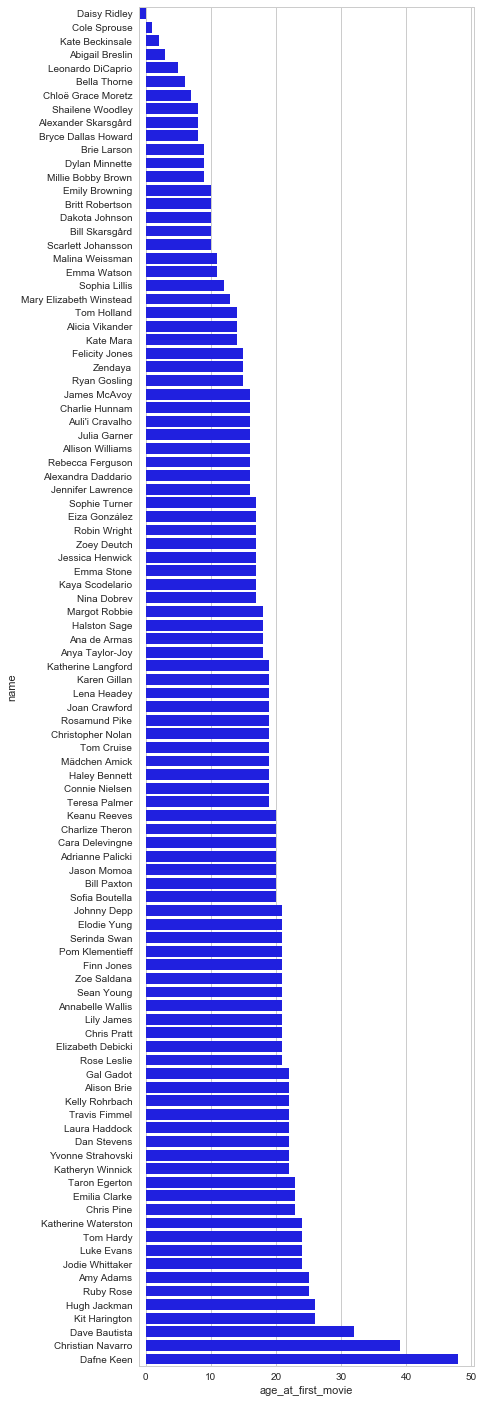

In [29]:
# your code here
sns.set(style='whitegrid')

# initialize the figure
f, ax = plt.subplots(figsize=(6, 25))

# prepare the dataframe
frame_to_plot = frame.sort_values(by=['age_at_first_movie'], ascending=True)

sns.barplot(x='age_at_first_movie', y='name', data=frame_to_plot, label='Age At First Movie', color='b')

*your answer here*

Clearly Daisy Ridley was not of negative age/unborn when she made her first movie as it would seem from looking at the data for our new field.  It turns out that Daisy Ridley voiced the lead female role for the English translation (made in 2015) of the Japanese animated classic Only Yesterday from Studio Ghibli.  Dev Patel from Slumdog Millionaire fame voiced the male lead.  While the translation was released in 2016, the original was released in 1991 resulting in a value of -1 for Daisy Ridley's age_at_first_movie predictor (the actress was born in 1992).  Since her first credit according to IMDB occurred in 2012, she should not show up in our list of performers who made their first movie before 12 in 1.7.1.  It turns out that the birth years for Christian Navarro and Dafne Keen (listed in our staff_starinfo json file don't match those on their IMDB pages leading to questionable values for age at first movie for those two actors as well.  While you we don't expect you to find or handle these issues in your homework, these are the sorts of problems that you'll run into as a data scientist and you should always do some EDA/Data Cleansing whenever you receive new data.

**2.7 You are now ready to answer the following intriguing questions**:

**2.7.1 How many performers made their first movie at 17?**

In [30]:
# your code here
df17 = frame.groupby('age_at_first_movie')
print ("{} performers made their first movie at 17".format(len(df17.get_group(17))))

8 performers made their first movie at 17


Your output should look like this:<BR>
8 performers made their first movie at 17

**2.7.2 How many performers started as child actors? Define child actor as a person less than 12 years old.** 

In [31]:
# your code here
fields2 = ['name', 'year_born', 'first_movie', 'year_first_movie', 'age_at_first_movie']
childdf = frame[(frame.age_at_first_movie<=12) & (frame.age_at_first_movie>=0)][fields2]
childdf
print ("{} performers made their first movie before age 12".format(len(childdf.name)))

## We use a compound pandas mask (frame.age_at_first_movie<=12) & (frame.age_at_first_movie>=0) 
## to both find child performers who had their first credits at 12 and younger but also to weed 
## out any entries below 0.

20 performers made their first movie before age 12


**2.8 Make a plot of the number of credits versus the name of actor/actress.**

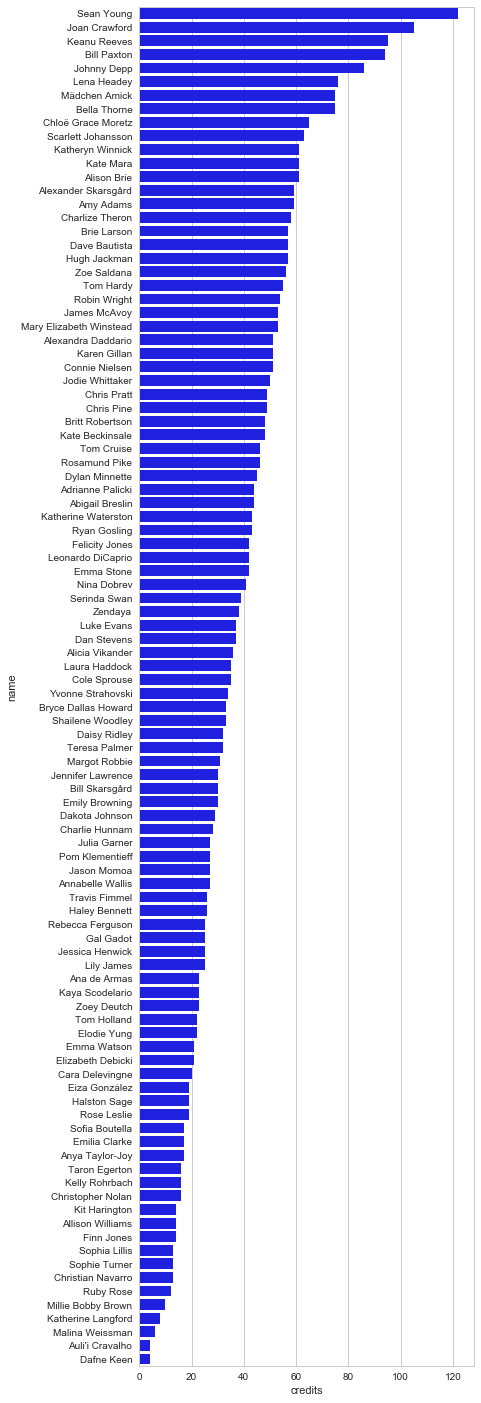

In [32]:
# your code here

sns.set(style='whitegrid')

# initialize the figure
f, ax = plt.subplots(figsize=(6, 25))

# prepare the dataframe
frame_to_plot = frame.sort_values(by=['credits'], ascending=False)

sns.barplot(x='credits', y='name', data=frame_to_plot, label='Credits', color='b')

In [33]:
# your code here 
highest_performer_name = frame.name[frame.credits.idxmax]
highest_performer_credits = frame.credits[frame.credits.idxmax]
print ("{} had the most credits with {}".format(highest_performer_name,highest_performer_credits))

Sean Young had the most credits with 122


<hr style="height:2px">
##  Going the Extra Mile 
Be sure to complete problems 1 and 2 before tackling this problem...it is worth only 8 points.


<div class='exercise'> <b>Question 3 [8 pts]: Parsing using Regular Expressions (regex) </b></div>

Even though scraping HTML with regex is sometimes considered bad practice, you are to use python's **regular expressions** to answer this problem.  Regular expressions are useful to parse strings, text, tweets, etc. in general (for example, you may encounter a non-standard format for dates at some point). Do not use BeautifulSoup to answer this problem.

 **3.1** Write a function called `get_pubs` that takes an .html filename as an input and returns a string containing the HTML page in this file (see definition below). Call this function using `data/publist_super_clean.html` as input and name the returned string `prof_pubs`. 
 
 **3.2** Calculate how many times the author named '`C.M. Friend`' appears in the list of publications. 
 
 **3.3** Find all unique journals and copy them in a variable named `journals`.  
 
 **3.4** Create a list named `pub_authors` whose elements are strings containing the authors' names for each paper. 
    
### Hints
- Look for patterns in the HTML tags that reveal where each piece of information such as the title of the paper, the names of the authors, the journal name, is stored. For example, you might notice that the journal name(s) is contained between the &lt;I&gt; HTML tag. 
- Learning about your domain is always a good idea: you want to check the names to make sure that they belong to actual journals. Thus, while journal name(s) is contained between the &lt;I&gt; HTML tag, please note that <i>all</i> strings found between &lt;I&gt; tags may not be journal names.
- Each publication has multiple authors. 
- `C.M. Friend` also shows up as `Cynthia M. Friend` in the file.  Count just `C. M. Friend`. 
- There is a comma at the end of the string of authors. You can choose to keep it in the string or remove it and put it back when you write the string as a BibTex entry. 
- You want to remove duplicates from the list of journals. Duplicates may also occur due to misspellings or spaces, such as: `Nano Lett.`, and `NanoLett.` You can assume that any journals with the same initials (e.g., `NL` for `NanoLett.`) are the same journal.

### Resources
- **Regular expressions:** a) https://docs.python.org/3.3/library/re.html, b) https://regexone.com, and c) https://docs.python.org/3/howto/regex.html. 
- ** HTML:** if you are not familiar with HTML see https://www.w3schools.com/html/ or one of the many tutorials on the internet. 
- ** Document Object Model (DOM):** for more on this programming interface for HTML and XML documents see https://www.w3schools.com/js/js_htmldom.asp. 

### Answers

** 3.1  Write a function called `get_pubs` that takes an .html filename as an input and returns a string  ... **    

In [34]:
# first import the necessary reg expr library
import re

In [35]:
# use this file provided
PUB_FILENAME = 'data/publist_super_clean.html'

In [36]:
# your code here

def get_pubs(filename: str) -> list:
    
    '''Open the file using the filename. 
       
       Args:
           filename: A string name of the file.
       
       Returns:
           A string containing the HTML page ready to be parsed.
    '''
    with open(filename) as my_file:
        pubs = my_file.read()
    start = re.search(r"<OL START=244>",pubs).end() # clean the data prior to <OL START=244>
    pubs = pubs[start:]
    
    return pubs

In [37]:
# your code here
prof_pubs = get_pubs(PUB_FILENAME)

In [38]:
# checking your code 
# clear/remove output before creating the pdf file
print(prof_pubs)


<LI>
<A HREF="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
&quot;Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons&quot;</A>
<BR>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  125411 (2011)
<BR>
</LI>
</OL>

<OL START=243>
<LI>
<A HREF="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
&quot;Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles&quot;</A>
<BR>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  035325 (2011)
<BR>
</LI>
</OL>

<OL START=242>
<LI>
<A HREF="Papers/2011/PhysRevB_83_054204_2011.pdf" target="paper242">
&quot;Influence of CH2 content and network defects on the elastic properties of organosilicate glasses&quot;</A>
<BR>Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras,
<I>PHYSICAL REVIEW B </I> <b>83</b>,  054204 (2011)
<BR>


You should see an HTML page that looks like this (colors are not important)
```html
<LI>
<A HREF="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
&quot;Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons&quot;</A>
<BR>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  125411 (2011)
<BR>
</LI>
</OL>

<OL START=243>
<LI>
<A HREF="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
&quot;Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles&quot;</A>
<BR>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  035325 (2011)
<BR>
</LI>
</OL>

<OL START=242>
<LI>
<A HREF="Papers/2011/PhysRevB_83_054204_2011.pdf" target="paper242">
&quot;Influence of CH2 content and network defects on the elastic properties of organosilicate glasses&quot;</A>
<BR>Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras,
<I>PHYSICAL REVIEW B </I> <b>83</b>,  054204 (2011)
<BR>
</LI>
</OL>
    ```

**3.2 Calculate how many times the author ... **

In [39]:
# your code here
name = 'C.M. Friend'
tag = prof_pubs
print (len(re.findall(name, tag)))

#alternatively:
print(prof_pubs.count('C.M. Friend'))

5
5


**3.3 Find all unique journals and copy ...**

In [40]:
# your code here 
# we notice that journal names are between <i> tags
def find_jname(tag):
    raw_journals = re.findall(r'<I>(.*?)</I>',str(tag))
           
    clean_names = set()
    clean_abbrevs = set()
    clean_intermedite = []
    clean_journals = []

    for j in raw_journals:
        # handles cases like ('Nano Lett.', 'NanoLett.'), ('New Journal of Physics', 'New J. Phys.')
        clean_name = re.sub('[^A-Z]+', '', j) #.lower()
        if clean_name not in clean_names:
            clean_names.add(clean_name)
            clean_intermedite.append(j.strip())

    for j in clean_intermedite: 
        # handles cases like ('Phys. Rev. B', 'PHYSICAL REVIEW B')
        clean_abbrev = ''.join(x for x in j.title() if not x.isspace())
        clean_abbrev = re.sub('[^A-Z]+', '', clean_abbrev)
        if clean_abbrev not in clean_abbrevs:
            clean_abbrevs.add(clean_abbrev)
            clean_journals.append(j.strip())            
            
    return set(clean_journals)

journals = find_jname(prof_pubs)

In [41]:
# check your code 
journals

{'2010 ACM/IEEE International Conference for High Performance',
 'ACSNano.',
 'Ab initio',
 'Acta Mater.',
 'Catal. Sci. Technol.',
 'Chem. Eur. J.',
 'Comp. Phys. Comm.',
 'Concurrency Computat.: Pract. Exper.',
 'Energy & Environmental Sci.',
 'Int. J. Cardiovasc. Imaging',
 'J. Chem. Phys.',
 'J. Chem. Theory Comput.',
 'J. Phys. Chem. B',
 'J. Phys. Chem. C',
 'J. Phys. Chem. Lett.',
 'J. Stat. Mech: Th. and Exper.',
 'Langmuir',
 'Molec. Phys.',
 'Nano Lett.',
 'New Journal of Physics',
 'PHYSICAL REVIEW B',
 'Phil. Trans. R. Soc. A',
 'Phys. Rev. E - Rap. Comm.',
 'Phys. Rev. Lett.',
 'Sci. Model. Simul.',
 'Sol. St. Comm.',
 'Top. Catal.'}

Your output should look like this (no duplicates):
```
{'2010 ACM/IEEE International Conference for High Performance',
 'ACSNano.',
 'Acta Mater.',
 'Catal. Sci. Technol.',
 'Chem. Eur. J.',
 'Comp. Phys. Comm.',
 'Concurrency Computat.: Pract. Exper.',
 'Energy & Environmental Sci.',
 'Int. J. Cardiovasc. Imaging',
 'J. Chem. Phys.',
 'J. Chem. Theory Comput.',
 'J. Phys. Chem. B',
 'J. Phys. Chem. C',
 'J. Phys. Chem. Lett.',
 'J. Stat. Mech: Th. and Exper.',
 'Langmuir',
 'Molec. Phys.',
 'Nano Lett.',
 'New Journal of Physics',
 'PHYSICAL REVIEW B',
 'Phil. Trans. R. Soc. A',
 'Phys. Rev. E - Rap. Comm.',
 'Phys. Rev. Lett.',
 'Sci. Model. Simul.',
 'Sol. St. Comm.',
 'Top. Catal.'}
 ```

**3.4 Create a list named `pub_authors`...**

In [42]:
# your code here
def find_authors(tag):
    
    # find instances of a <BR> tag, a bunch of whatever, a newline, and an <I> tag
    # (authors are always listed after a break, on thier own line, before the journal)
    raw_authors_list = re.findall(r'<BR>(.*)\n<I>',tag)
    
    # a list comprehension version of the for loop we used to clean the journals
    clean_authors_list = [item.strip() for item in raw_authors_list]
    
    return clean_authors_list
    
pub_authors = find_authors(prof_pubs)

In [43]:
# check your code: print the list of strings containing the author(s)' names
for item in pub_authors:
    print (item)

Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras,
Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsiang-Han Tseng, Adam Gali,
Simone Melchionna, Efthimios Kaxiras, Massimo Bernaschi and Sauro Succi,
J R Maze, A Gali, E Togan, Y Chu, A Trifonov,
Kejie Zhao, Wei L. Wang, John Gregoire, Matt Pharr, Zhigang Suo,
Masataka Katono, Takeru Bessho, Sheng Meng, Robin Humphry-Baker, Guido Rothenberger,
Thomas D. Kuhne, Tod A. Pascal, Efthimios Kaxiras, and Yousung Jung,
Sheng Meng, Efthimios Kaxiras, Md. K. Nazeeruddin, and Michael Gratzel,
Bingjun Xu, Jan Haubrich, Thomas A. Baker, Efthimios Kaxiras, and Cynthia M. Friend,
Jun Ren, Sheng Meng, Yi-Lin Wang, Xu-Cun Ma, Qi-Kun Xue, Efthimios Kaxiras,
Jan Haubrich, Efthimios Kaxiras, and Cynthia M. Friend,
Thomas A. Baker, Bingjun Xu, Stephen C. Jensen, Cynthia M. Friend and Efthimio

Your output should look like this (a line for each paper's authors string of names)
```
Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras,
Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsiang-Han Tseng, Adam Gali,

...

T.A. Baker, C.M. Friend and E. Kaxiras,
T.A. Baker, C.M. Friend and E. Kaxiras,
E. Kaxiras and S. Succi,
E. Manousakis, J. Ren, S. Meng and E. Kaxiras,
```